In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
SEED = 42
pd.set_option("display.max_columns", None)

In [3]:
data = pd.read_csv("data.csv", delimiter="\t")
data

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,8,2044,4,34,2153,4,33,2416,4,10,2818,4,13,2259,2,21,5541,1,38,4441,4,31,2451,4,24,3325,4,14,1416,4,37,5021,4,27,2342,4,39,2480,3,6,2476,4,35,1627,3,17,9050,3,30,7001,1,11,4719,4,20,2984,4,36,1313,4,42,2444,4,1,9880,4,2,4695,4,5,1677,3,4,6723,4,3,5953,2,26,8062,4,12,5560,4,7,3032,2,29,3316,3,40,3563,4,23,5594,4,41,1477,1,18,3885,2,9,5265,4,19,1892,3,22,4228,4,32,1574,4,15,2969,IN,2,19,167,166,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,28,3090,4,10,5078,4,40,2790,3,18,3408,4,1,8342,3,37,916,2,32,1537,2,21,3926,2,25,3691,4,26,2004,4,4,8888,3,27,4109,3,19,4058,4,12,3692,2,6,3373,1,23,6015,1,16,3023,2,22,2670,3,3,5727,1,39,3641,2,33,2670,2,7,7649,3,11,2537,3,5,2907,4,9,1685,3,41,4726,3,17,6063,2,20,3307,3,14,4995,3,38,2505,2,34,2540,2,31,4359,3,15,3925,4,13,4609,2,30,3755,2,42,2323,1,24,5713,2,8,1334,2,29,5562,US,2,1,193,186,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,13,6470,4,11,3927,3,9,3704,1,17,4550,3,5,3021,2,32,5864,4,21,3722,2,10,3424,1,36,3236,4,23,2489,1,34,7290,4,12,6587,4,22,3627,4,38,2905,2,18,2998,2,8,10233,1,16,4258,4,28,2888,3,4,59592,2,3,11732,4,2,8834,2,29,7358,1,30,4928,2,15,3036,1,19,4127,2,37,3934,2,26,10782,4,1,8273,3,39,3501,1,27,3824,4,25,2141,3,6,17461,4,24,1557,4,40,4446,4,42,1883,2,35,5790,2,14,4432,1,20,2203,4,31,5768,PL,2,5,271,122,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,27,4556,3,28,3269,3,26,3231,4,2,7138,2,19,3079,3,31,9650,3,17,4179,2,5,5928,1,21,2838,1,20,2560,4,29,5139,2,22,3597,2,35,3336,3,10,4506,1,14,2695,1,25,8128,2,15,3125,1,6,4061,1,40,4272,1,12,4029,1,9,5630,1,18,30631,2,24,9870,4,4,2411,1,16,9478,3,1,7618,3,32,12639,3,34,5378,1,41,8923,2,38,2977,4,3,5620,1,7,16760,1,8,6427,2,39,3760,1,13,4112,3,42,2769,4,33,4432,4,30,3643,2,36,3698,US,2,3,261,336,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,10,2802,4,2,5628,2,9,6522,4,34,2374,4,11,3054,4,7,2975,3,14,3524,2,33,3033,4,23,2132,4,17,1314,4,16,3181,4,26,2249,3,19,2623,4,35,3093,4,38,7098,4,37,1938,4,15,3502,3,32,4776,3,18,4463,4,4,2436,2,40,4047,4,31,3787,4,42,2102,2,1,12351,4,3,2410,2,22,5056,4,39,3343,3,27,3012,4,20,3520,4,8,1868,4,25,2536,3,24,3725,4,30,2130,3,29,3952,3,21,10694,3,41,3231,4,12,3604,4,28,1950,3,6,6265,MY,2,1766,164,157,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,2,3,10,1,10,2,1,4,Psychology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [4]:
data.shape

(39775, 172)

### Remove these features as they are extra information collected with the survey and has no effect to person for being depressed
* QxE
* QxI
* introelapse
* testelapse
* surveyelapse
* engnat
* hand
* orientation
* voted
* screensize
* uniquenetworklocation
* source
* VCLx
* country

In [5]:
removedFeatures = [f"Q{i}E" for i in range(1, 43)]
removedFeatures.extend([f"Q{i}I" for i in range(1, 43)])
removedFeatures.extend([f"VCL{i}" for i in range(1, 17)])
removedFeatures.extend(
    [
        "source",
        "introelapse",
        "testelapse",
        "surveyelapse",
        "engnat",
        "hand",
        "orientation",
        "voted",
        "country",
        "screensize",
        "uniquenetworklocation",
    ]
)
depression = data.drop(removedFeatures, axis=1)
depression.to_csv("depression.csv", index=False)

## MODIFIED DATASET

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

depression = pd.read_csv("depression.csv")
depression.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,religion,race,married,familysize,major
0,4,4,2,4,4,4,4,4,2,1,4,4,4,4,4,4,3,4,3,3,1,4,4,4,4,4,4,3,4,2,4,4,2,3,4,4,1,2,4,3,4,4,1,5,7,7,7,7,7,5,1,1,2,3,2,16,12,10,1,2,NaN
1,4,1,2,3,4,4,3,4,3,2,2,2,4,4,3,3,4,2,1,1,2,3,1,2,2,3,3,4,3,3,2,3,3,2,2,3,4,2,2,1,2,2,6,5,4,7,5,4,7,7,1,5,2,3,2,16,7,70,1,4,NaN
2,3,1,4,1,4,3,1,3,2,4,2,1,4,1,4,4,4,2,2,1,4,3,2,4,2,1,2,1,2,2,4,3,1,4,3,4,4,4,2,2,1,4,2,5,2,2,5,6,5,5,3,2,2,3,2,17,4,60,1,3,NaN
3,2,3,2,1,3,3,4,2,3,3,2,1,1,4,2,2,3,1,1,2,1,1,1,1,1,2,4,1,3,3,3,1,2,4,1,1,2,1,3,4,4,2,1,1,7,4,6,4,6,1,6,1,1,3,2,13,4,70,1,5,biology
4,2,2,3,4,4,2,4,4,4,3,2,4,4,4,4,3,4,4,4,4,3,3,4,2,4,4,2,4,2,4,3,4,4,4,3,4,3,3,3,4,4,3,2,5,3,6,5,5,5,6,3,3,3,2,2,19,10,10,1,4,Psychology


## NULL VALUES

Only "Major" column has null values

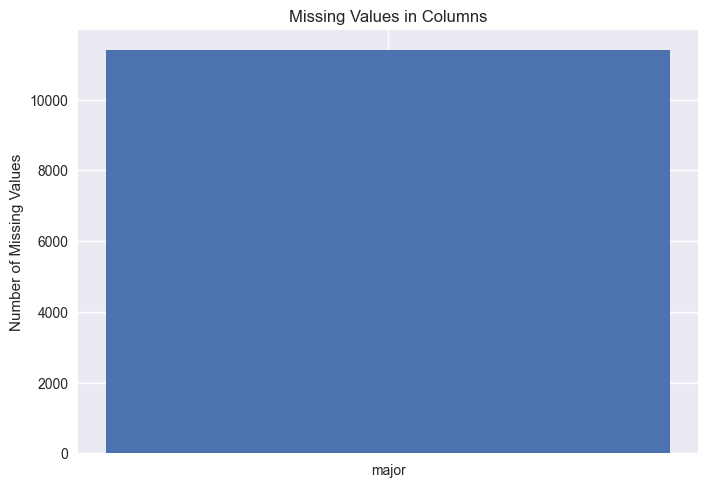

In [7]:
plt.style.use("seaborn-v0_8")
missing_values = depression.isnull().sum()
missing_values_nonzero = missing_values[missing_values > 0]
plt.bar(missing_values_nonzero.index, missing_values_nonzero.values)
plt.ylabel("Number of Missing Values")
plt.title("Missing Values in Columns")
plt.show()

## Education

Analysis 

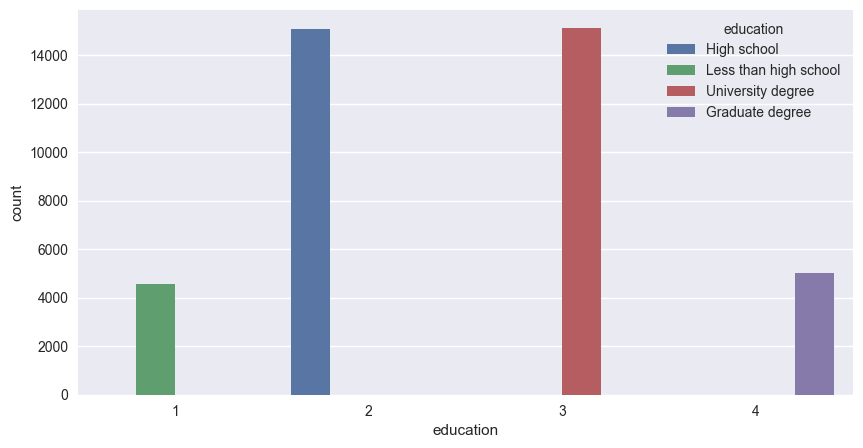

In [8]:
depression["education"] = depression["education"].map({0: 1, 1: 1, 2: 2, 3: 3, 4: 4})


def changeEducationTitle(title) -> str:
    if title == 0 or title == 1:
        return "Less than high school"
    if title == 2:
        return "High school"
    if title == 3:
        return "University degree"
    if title == 4:
        return "Graduate degree"
    return title


education_string = depression["education"].apply(changeEducationTitle)

plt.figure(figsize=(10, 5))
sns.countplot(x=depression["education"], hue=education_string)
plt.show()

### Major has null values and has no effect for person being depressed or not

In [9]:
depression.drop("major", inplace=True, axis=1)

## Urban

Analysis

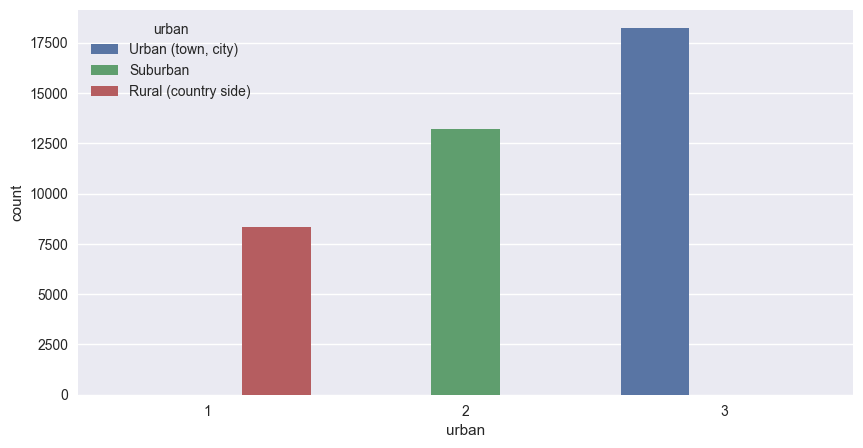

In [10]:
depression["urban"] = depression["urban"].map({0: 3, 1: 1, 2: 2, 3: 3})


def changeUrbanValues(value):
    if value == 1:
        return "Rural (country side)"
    if value == 2:
        return "Suburban"
    if value == 3:
        return "Urban (town, city)"
    return value


urban = depression["urban"].apply(changeUrbanValues)

plt.figure(figsize=(10, 5))
sns.countplot(x=depression["urban"], hue=urban)
plt.show()

## Gender

Analysis


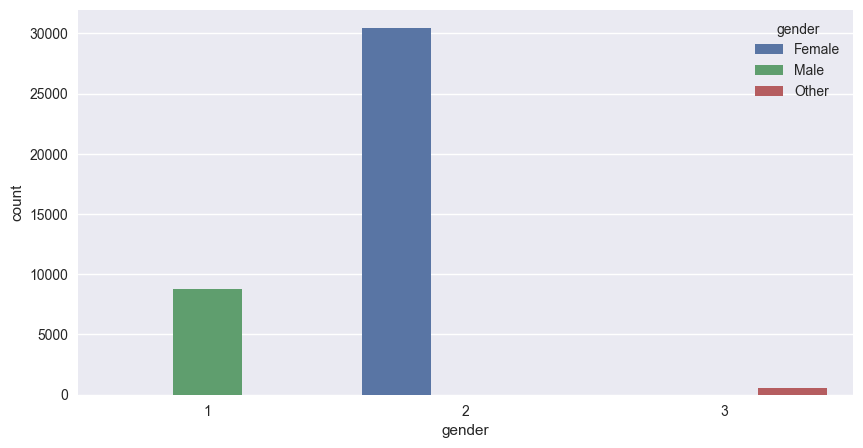

In [11]:
depression["gender"] = depression["gender"].map({0: 2, 1: 1, 2: 2, 3: 3})


def changeGenderValue(value):
    if value == 1:
        return "Male"
    if value == 2 or value == 0:
        return "Female"
    return "Other"


gender = depression["gender"].apply(changeGenderValue)

plt.figure(figsize=(10, 5))
sns.countplot(x=depression["gender"], hue=gender)
plt.show()

## Religion 

Analysis

10    22073
2      3845
1      3245
4      3097
7      2254
12     2160
6      1544
8       700
3       527
9       144
5       122
11       64
Name: religion, dtype: int64

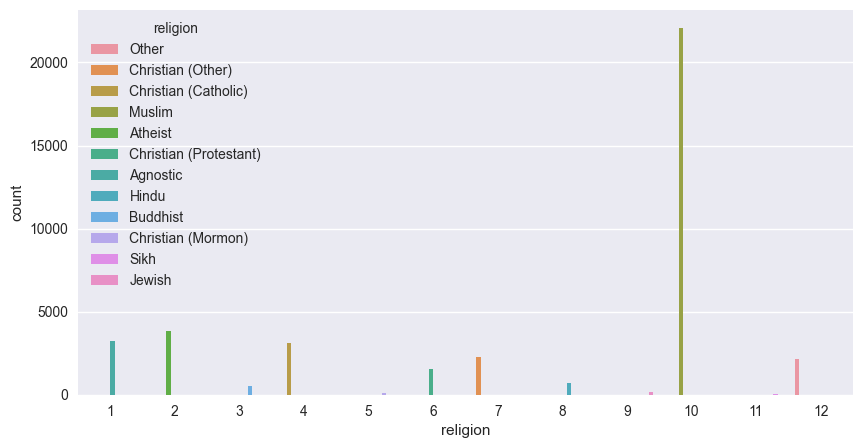

In [12]:
def updateEducationValue(value):
    if value == 0:
        return 12
    return value


depression["religion"] = depression["religion"].apply(updateEducationValue)


def changeReliginValues(value) -> str:
    if value == 0:
        return "Other"
    if value == 1:
        return "Agnostic"
    if value == 2:
        return "Atheist"
    if value == 3:
        return "Buddhist"
    if value == 4:
        return "Christian (Catholic)"
    if value == 5:
        return "Christian (Mormon)"
    if value == 6:
        return "Christian (Protestant)"
    if value == 7:
        return "Christian (Other)"
    if value == 8:
        return "Hindu"
    if value == 9:
        return "Jewish"
    if value == 10:
        return "Muslim"
    if value == 11:
        return "Sikh"
    if value == 12:
        return "Other"
    return value


religin = depression["religion"].apply(changeReliginValues)
display(depression["religion"].value_counts())

plt.figure(figsize=(10, 5))
sns.countplot(x=depression["religion"], hue=religin)
plt.show()

## Race

Analysis

1.0    23106
6.0    10659
7.0     4832
3.0      603
2.0      333
5.0      220
4.0       22
Name: race, dtype: int64

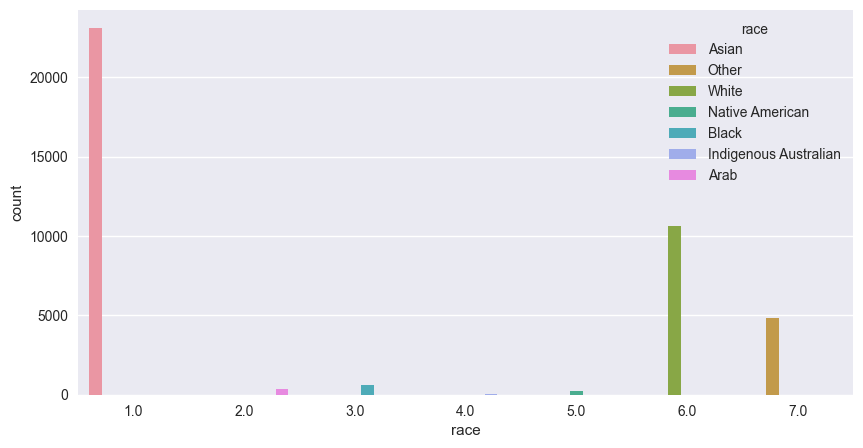

In [13]:
depression["race"] = depression["race"].apply(lambda x: x / 10)
depression["race"].head()


def changeRaceValues(value) -> str:
    if value == 1:
        return "Asian"
    if value == 2:
        return "Arab"
    if value == 3:
        return "Black"
    if value == 4:
        return "Indigenous Australian"
    if value == 5:
        return "Native American"
    if value == 6:
        return "White"
    if value == 7:
        return "Other"

    return value


race = depression["race"].apply(changeRaceValues)

display(depression["race"].value_counts())

plt.figure(figsize=(10, 5))
sns.countplot(x=depression["race"], hue=race)
plt.show()

## Personality 

Analysis


#### Extraverted and Enthusiastic

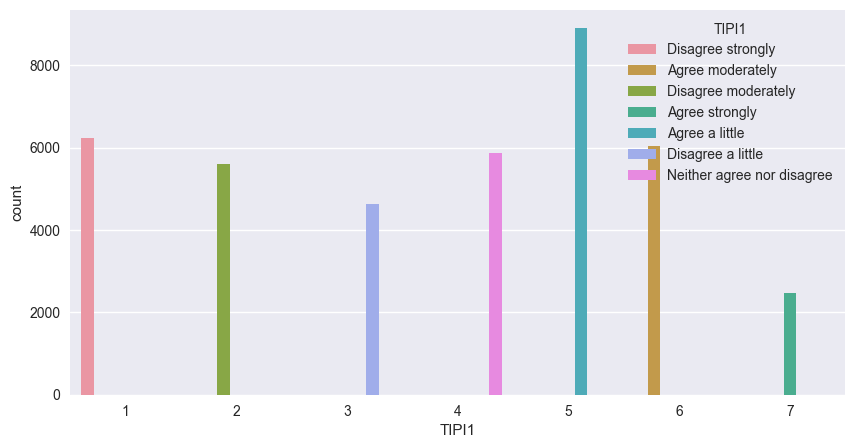

In [14]:
def changeFromToinTIPI(value, From, to):
    if value == From:
        return to
    return value


depression["TIPI1"] = depression["TIPI1"].apply(
    lambda value: changeFromToinTIPI(value, 0, 5)
)


def changeTIPIValues(value):
    if value == 1:
        return "Disagree strongly"
    if value == 2:
        return "Disagree moderately"
    if value == 3:
        return "Disagree a little"
    if value == 4:
        return "Neither agree nor disagree"
    if value == 5:
        return "Agree a little"
    if value == 6:
        return "Agree moderately"
    if value == 7:
        return "Agree strongly"

    return value


tipi = depression["TIPI1"].apply(changeTIPIValues)


plt.figure(figsize=(10, 5))
sns.countplot(x=depression["TIPI1"], hue=tipi)

plt.show()

### Critical and Quarrelsome

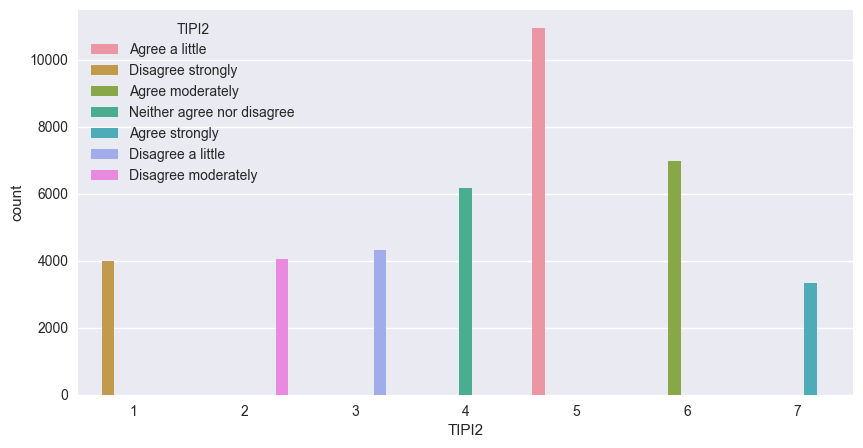

In [15]:
depression["TIPI2"] = depression["TIPI2"].apply(
    lambda value: changeFromToinTIPI(value, 0, 5)
)

tipi = depression["TIPI2"].apply(changeTIPIValues)

plt.figure(figsize=(10, 5))
sns.countplot(x=depression["TIPI2"], hue=tipi)
plt.show()

### Dependable and Self-disciplined.

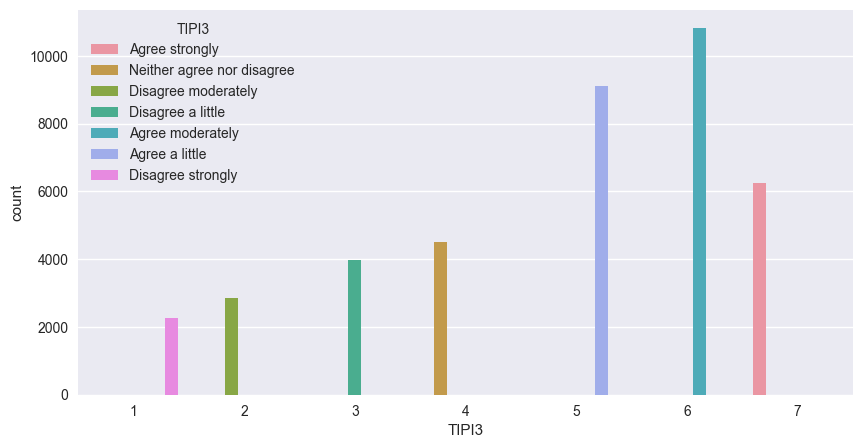

In [16]:
depression["TIPI3"] = depression["TIPI3"].apply(
    lambda value: changeFromToinTIPI(value, 0, 6)
)

tipi = depression["TIPI3"].apply(changeTIPIValues)

plt.figure(figsize=(10, 5))
sns.countplot(x=depression["TIPI3"], hue=tipi)
plt.show()

### Anxious and Easily Upset

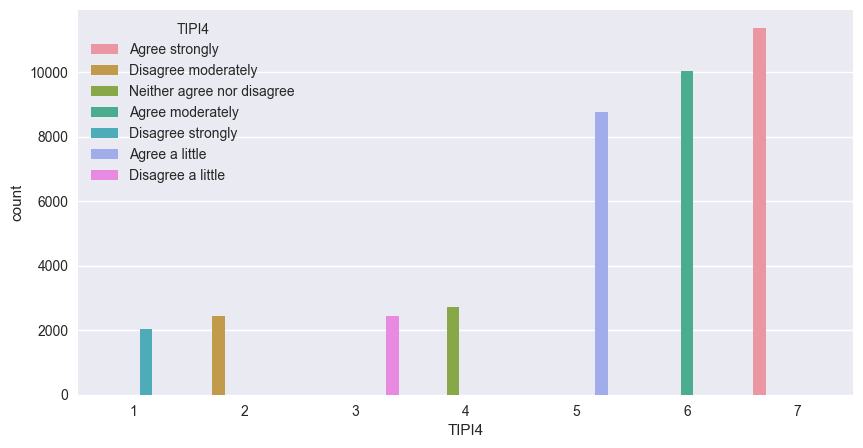

In [17]:
depression["TIPI4"] = depression["TIPI4"].apply(
    lambda value: changeFromToinTIPI(value, 0, 6)
)

tipi = depression["TIPI4"].apply(changeTIPIValues)

plt.figure(figsize=(10, 5))
sns.countplot(x=depression["TIPI4"], hue=tipi)
plt.show()

### Open to new experiences and complex

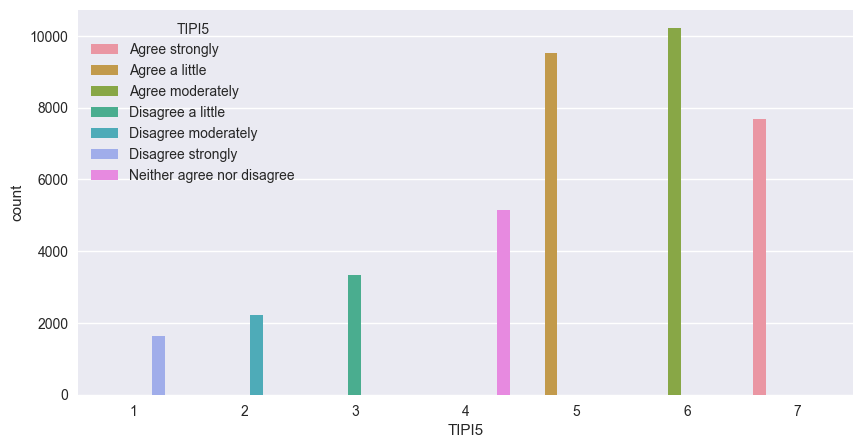

In [18]:
depression["TIPI5"] = depression["TIPI5"].apply(
    lambda value: changeFromToinTIPI(value, 0, 6)
)

tipi = depression["TIPI5"].apply(changeTIPIValues)

plt.figure(figsize=(10, 5))
sns.countplot(x=depression["TIPI5"], hue=tipi)
plt.show()

### Reserved and quiet

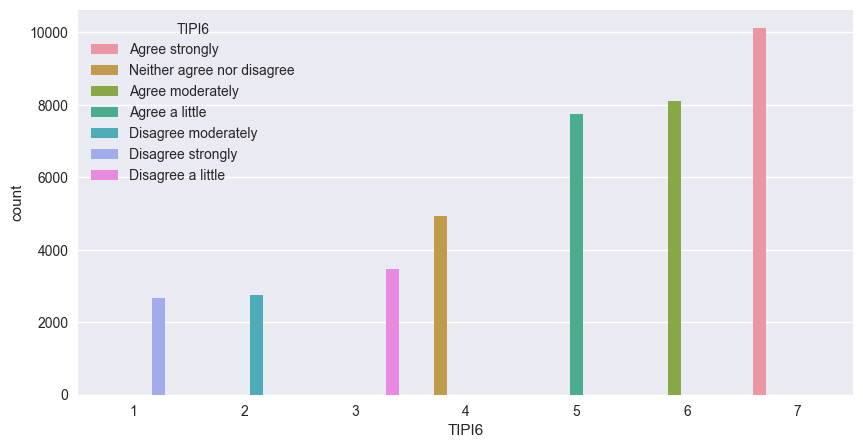

In [19]:
depression["TIPI6"] = depression["TIPI6"].apply(
    lambda value: changeFromToinTIPI(value, 0, 7)
)

tipi = depression["TIPI6"].apply(changeTIPIValues)

plt.figure(figsize=(10, 5))
sns.countplot(x=depression["TIPI6"], hue=tipi)
plt.show()

### Sympathetic and Warm

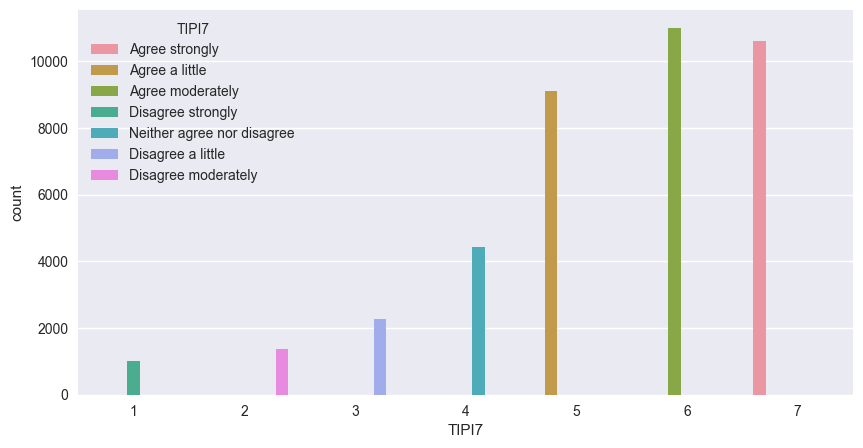

In [20]:
depression["TIPI7"] = depression["TIPI7"].apply(
    lambda value: changeFromToinTIPI(value, 0, 7)
)

tipi = depression["TIPI7"].apply(changeTIPIValues)

plt.figure(figsize=(10, 5))
sns.countplot(x=depression["TIPI7"], hue=tipi)
plt.show()

### Disorganized and Careless

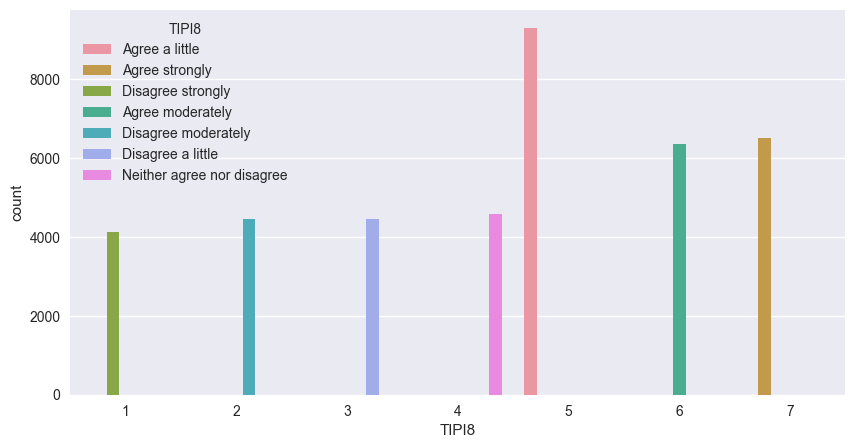

In [21]:
depression["TIPI8"] = depression["TIPI8"].apply(
    lambda value: changeFromToinTIPI(value, 0, 7)
)

tipi = depression["TIPI8"].apply(changeTIPIValues)

plt.figure(figsize=(10, 5))
sns.countplot(x=depression["TIPI8"], hue=tipi)
plt.show()

### Calm and Emotionally stable

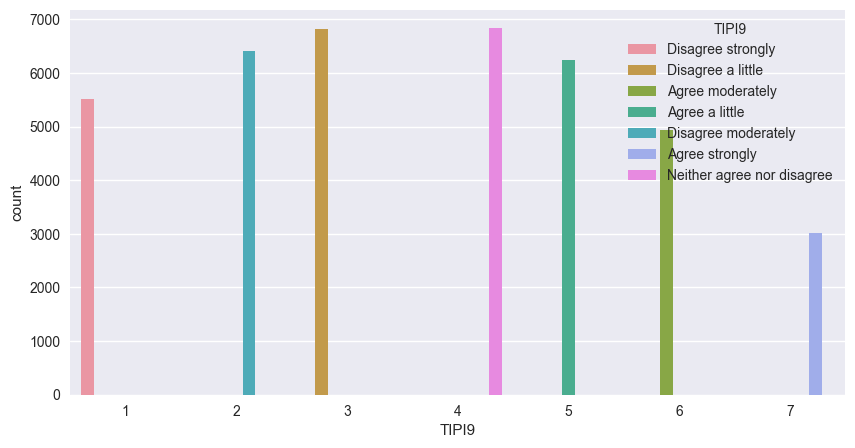

In [22]:
depression["TIPI9"] = depression["TIPI9"].apply(
    lambda value: changeFromToinTIPI(value, 0, 7)
)

tipi = depression["TIPI9"].apply(changeTIPIValues)

plt.figure(figsize=(10, 5))
sns.countplot(x=depression["TIPI9"], hue=tipi)
plt.show()

### Conventional and Uncreative

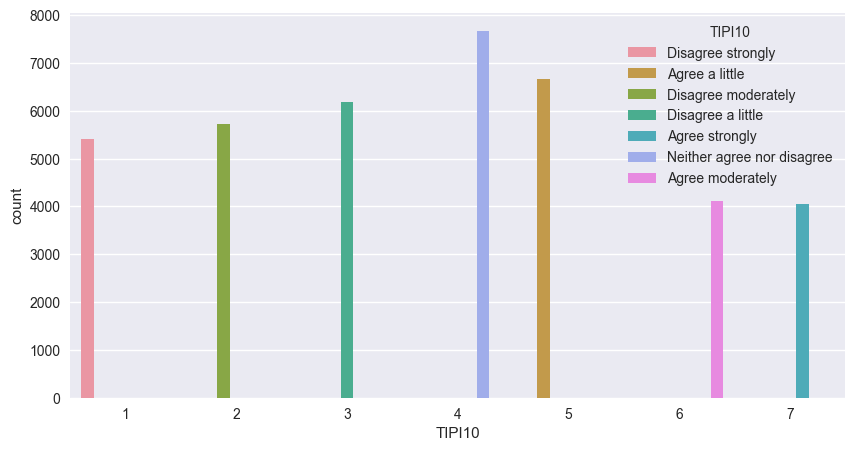

In [23]:
depression["TIPI10"] = depression["TIPI10"].apply(
    lambda value: changeFromToinTIPI(value, 0, 7)
)

tipi = depression["TIPI10"].apply(changeTIPIValues)

plt.figure(figsize=(10, 5))
sns.countplot(x=depression["TIPI10"], hue=tipi)
plt.show()

### Family Size 

* Analysis
* It seems that there are outliers, so we'll remove records that has familysize more than 13

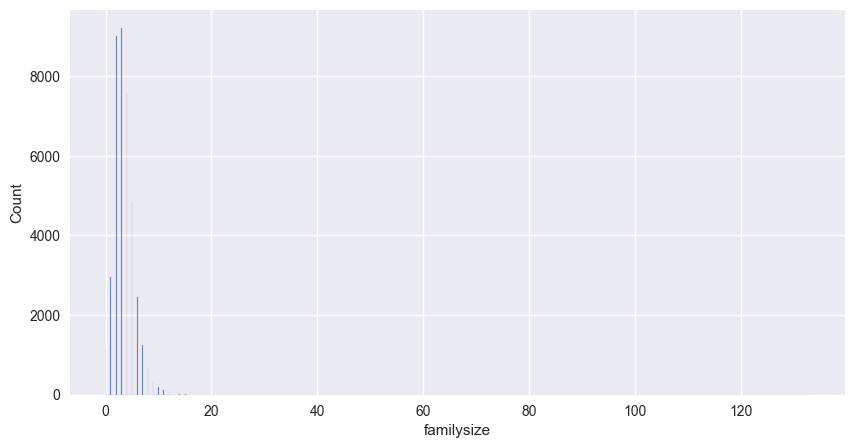

In [24]:
plt.figure(figsize=(10, 5))
sns.histplot(x=depression["familysize"])
plt.show()

Depression size before: 39775
Depression size after: 39743


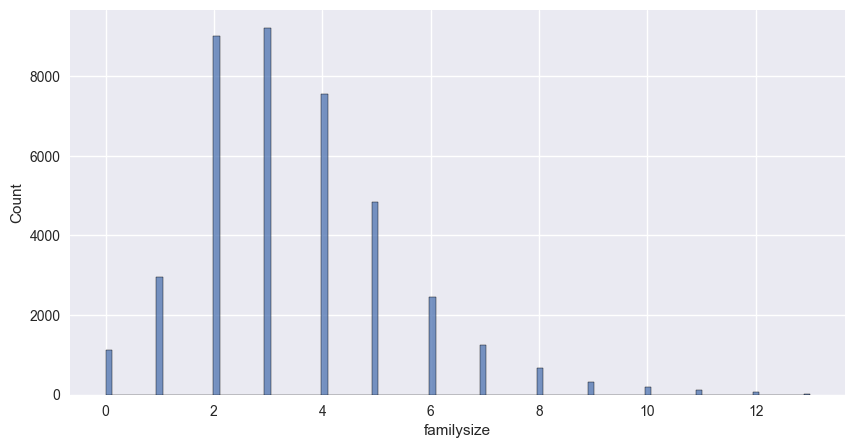

In [25]:
indexes = depression[depression["familysize"] > 13].index

print(f"Depression size before: {depression.shape[0]}")
depression = depression.drop(indexes, axis=0)
print(f"Depression size after: {depression.shape[0]}")
plt.figure(figsize=(10, 5))
sns.histplot(x=depression["familysize"])
plt.show()

## Married

Analysis


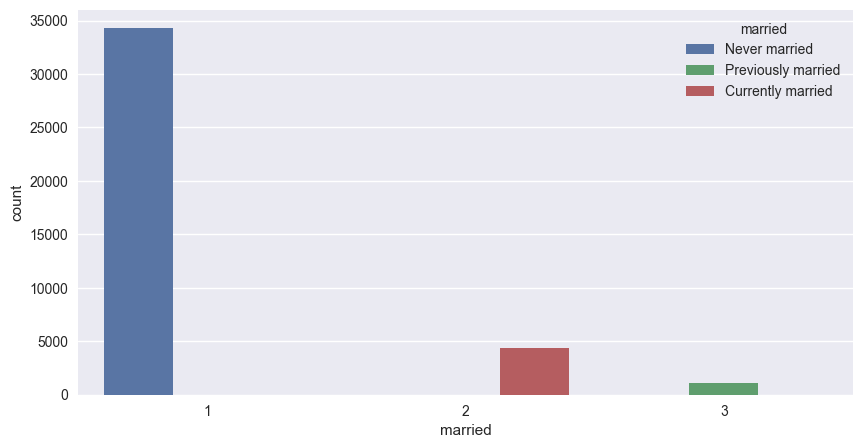

In [26]:
def change0to1inMarried(value):
    if value == 0:
        return 1
    return value


depression["married"] = depression["married"].apply(change0to1inMarried)


def changeMarriedValueToString(value):
    if value == 1:
        return "Never married"
    if value == 2:
        return "Currently married"
    if value == 3:
        return "Previously married"
    return value


married = depression["married"].apply(changeMarriedValueToString)

plt.figure(figsize=(10, 5))
sns.countplot(x=depression["married"], hue=married)
plt.show()

## Age

Analysis


20      3788
21      3532
19      3506
18      3045
22      3006
        ... 
89         1
1996       1
223        1
78         1
1991       1
Name: age, Length: 78, dtype: int64

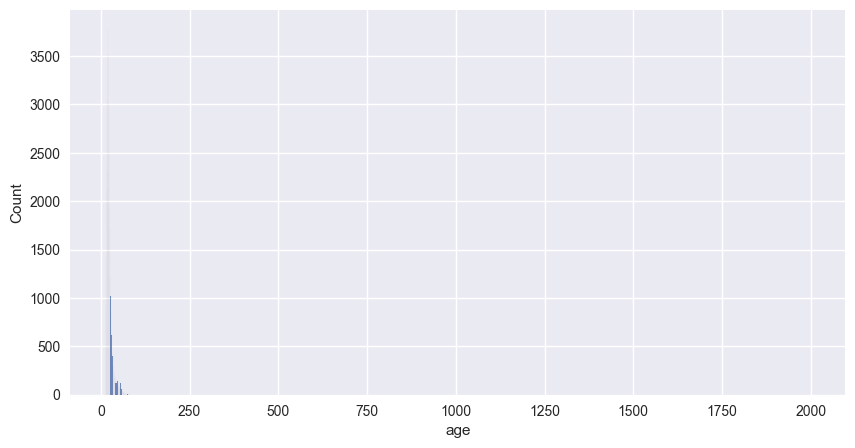

In [27]:
display(depression["age"].value_counts())
plt.figure(figsize=(10, 5))
sns.histplot(x=depression["age"])
plt.show()

Int64Index([527, 5340, 10231, 10878, 14236, 14367, 21383, 24898, 30027, 33730], dtype='int64')

Depression size before: 39743
Depression size after: 39733


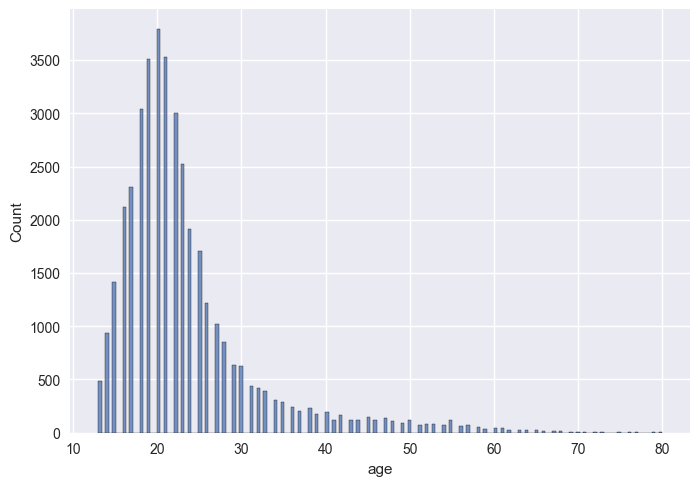

In [28]:
age_indexes = depression[depression["age"] > 80]["age"].index

display(age_indexes)

print(f"Depression size before: {depression.shape[0]}")
depression.drop(age_indexes, axis=0, inplace=True)
print(f"Depression size after: {depression.shape[0]}")
sns.histplot(x=depression["age"])
plt.show()

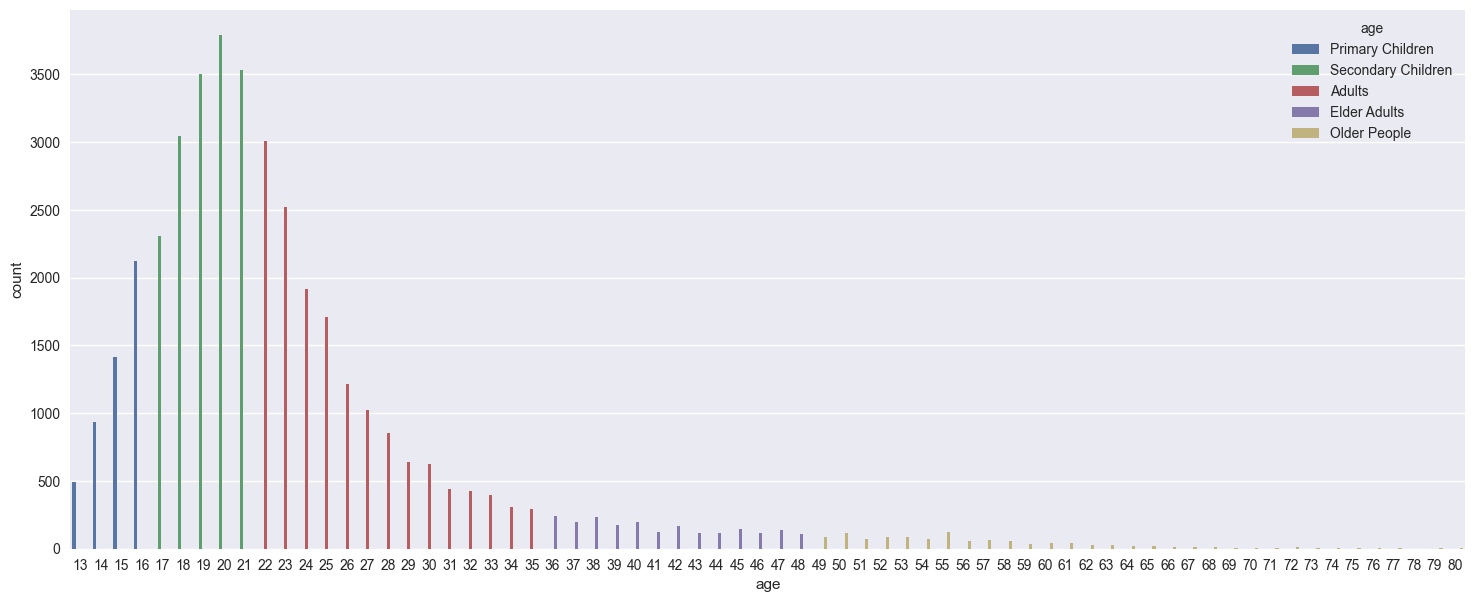

In [29]:
def makeAgeGroup(value):
    if value <= 10:
        return "Under 10"
    if 10 <= value <= 16:
        return "Primary Children"
    if 17 <= value <= 21:
        return "Secondary Children"
    if 21 <= value <= 35:
        return "Adults"
    if 36 <= value <= 48:
        return "Elder Adults"
    if value >= 49:
        return "Older People"


age = depression["age"].apply(makeAgeGroup)

plt.figure(figsize=(18, 7))
sns.countplot(x=depression["age"], hue=age)
plt.show()

In [30]:
def makeAgeGroupFeature(value):
    if value <= 10:
        return 1
    if 10 <= value <= 16:
        return 2
    if 17 <= value <= 21:
        return 3
    if 21 <= value <= 35:
        return 4
    if 36 <= value <= 48:
        return 5
    if value >= 49:
        return 6


depression["age_group"] = depression["age"].apply(makeAgeGroupFeature)

depression.drop("age", axis=1, inplace=True)

## DEPENDENT VARIABLE 

In [31]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
depression["total_count"] = depression.sum(axis=1)
depression["total_count"].describe()

count    39733.000000
mean       171.196864
std         30.943365
min         71.000000
25%        147.000000
50%        170.000000
75%        194.000000
max        270.000000
Name: total_count, dtype: float64

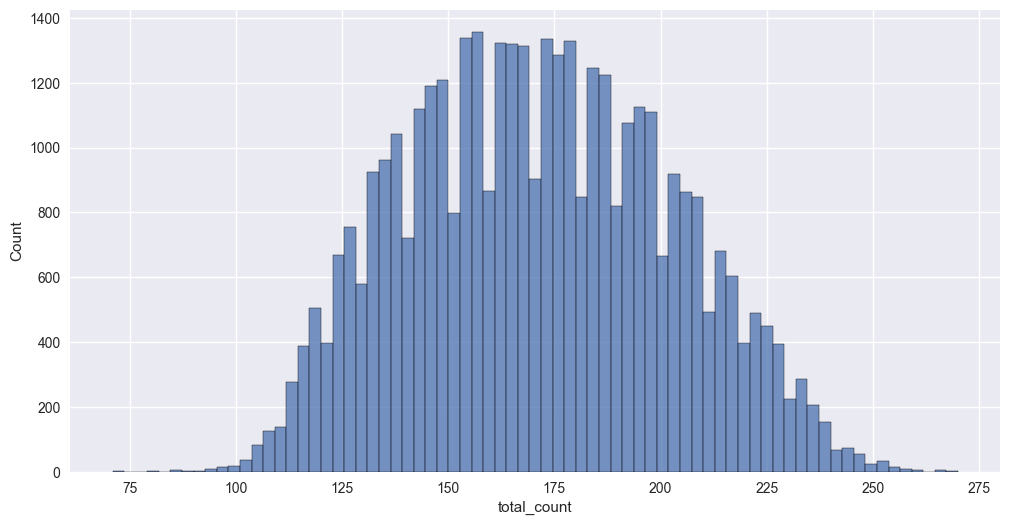

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,religion,race,married,familysize,age_group,total_count
0,4,4,2,4,4,4,4,4,2,1,4,4,4,4,4,4,3,4,3,3,1,4,4,4,4,4,4,3,4,2,4,4,2,3,4,4,1,2,4,3,4,4,1,5,7,7,7,7,7,5,1,1,2,3,2,12,1.0,1,2,2,216.0
1,4,1,2,3,4,4,3,4,3,2,2,2,4,4,3,3,4,2,1,1,2,3,1,2,2,3,3,4,3,3,2,3,3,2,2,3,4,2,2,1,2,2,6,5,4,7,5,4,7,7,1,5,2,3,2,7,7.0,1,4,2,189.0
2,3,1,4,1,4,3,1,3,2,4,2,1,4,1,4,4,4,2,2,1,4,3,2,4,2,1,2,1,2,2,4,3,1,4,3,4,4,4,2,2,1,4,2,5,2,2,5,6,5,5,3,2,2,3,2,4,6.0,1,3,3,171.0
3,2,3,2,1,3,3,4,2,3,3,2,1,1,4,2,2,3,1,1,2,1,1,1,1,1,2,4,1,3,3,3,1,2,4,1,1,2,1,3,4,4,2,1,1,7,4,6,4,6,1,6,1,1,3,2,4,7.0,1,5,2,153.0
4,2,2,3,4,4,2,4,4,4,3,2,4,4,4,4,3,4,4,4,4,3,3,4,2,4,4,2,4,2,4,3,4,4,4,3,4,3,3,3,4,4,3,2,5,3,6,5,5,5,6,3,3,3,2,2,10,1.0,1,4,3,212.0


In [32]:
plt.figure(figsize=(12, 6))
sns.histplot(x=depression["total_count"])
plt.show()
depression.head()

In [33]:
depression["total_count"].describe()

count    39733.000000
mean       171.196864
std         30.943365
min         71.000000
25%        147.000000
50%        170.000000
75%        194.000000
max        270.000000
Name: total_count, dtype: float64

In [34]:
depression[depression["total_count"] < 170]["total_count"].describe()

count    19486.000000
mean       145.050344
std         15.981407
min         71.000000
25%        133.000000
50%        147.000000
75%        158.000000
max        169.000000
Name: total_count, dtype: float64

In [35]:
depression[depression["total_count"] < 147]["total_count"].describe()

count    9583.000000
mean      131.463634
std        10.574053
min        71.000000
25%       124.000000
50%       133.000000
75%       140.000000
max       146.000000
Name: total_count, dtype: float64

In [36]:
depression[depression["total_count"] > 170]["total_count"].describe()

count    19812.000000
mean       196.939431
std         18.273685
min        171.000000
25%        182.000000
50%        194.000000
75%        209.000000
max        270.000000
Name: total_count, dtype: float64

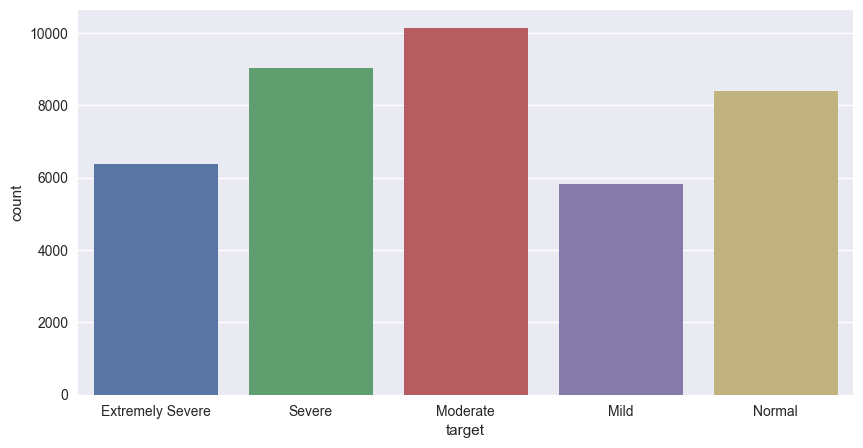

In [37]:
def buildTargetMove15Steps(value):
    if value <= 143:
        return "Normal"
    if 143 < value <= 157:
        return "Mild"
    if 157 < value <= 180:
        return "Moderate"
    if 180 < value <= 204:
        return "Severe"
    if value > 204:
        return "Extremely Severe"


depression["target"] = depression["total_count"].apply(buildTargetMove15Steps)

plt.figure(figsize=(10, 5))
sns.countplot(x=depression["target"])
plt.show()

In [38]:
target = depression["target"]
depression.drop(["target", "total_count"], axis=1, inplace=True)

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(depression, target, test_size=0.2)

print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")

x_train: (31786, 60), y_train: (31786,)
x_test: (7947, 60), y_test: (7947,)


In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=SEED)
rnd_clf.fit(x_train_scaled, y_train)

y_pred = rnd_clf.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.4f}")

Accuracy on the test set: 0.7756
